In [0]:
%tensorflow_version 2.x

# ***Importing Libraries***

In [15]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

2.2.0


***Load Data set from MNIST dataset***

In [16]:
(x_train,_),(_,_) = mnist.load_data()
#print(x_test.shape)
x_train, x_test = train_test_split(x_train[:30000], test_size = 0.2, random_state = 20)
#x_train = x_train[:10000]
#x_test = x_train[12000:14000]
print(x_train.shape)
print(x_test.shape)

(24000, 28, 28)
(6000, 28, 28)


***Preprocess data***

In [0]:
x_train= x_train.astype('float32')/255.
x_test= x_test.astype('float32')/255.
x_train= np.reshape(x_train,(len(x_train),28,28,1))
x_test= np.reshape(x_test,(len(x_test),28,28,1))


***Adding noise to clean images by 30%***



In [0]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(0,1, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(0,1, size = x_test.shape)


In [0]:
x_train_noisy = np.clip(x_train_noisy,0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

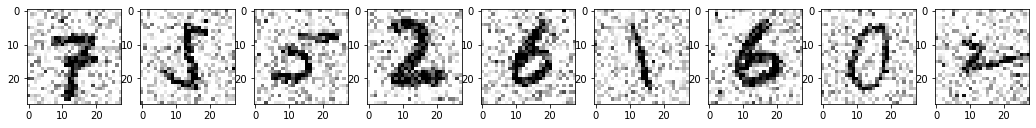

In [20]:
plt.figure(figsize = (20, 2))
for i in range (1,10):
  ax = plt.subplot(1,10,i)
  plt.imshow(x_train_noisy[i].reshape(28,28), cmap = 'binary')
plt.show()

***Define the model using Multi layer perceptron***

In [0]:
#number of neurons in each layer
n_input = 784
H_1 = 256
H_2 = 32
H_3 = 16
H_4 = 8
H_5 = 8
H_6 = 16
H_7 = 32
H_8 = 256

In [0]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(n_input,activation = "relu", input_shape = (28,28,1)))
model.add(tf.keras.layers.Dense(H_1, activation="relu"))
model.add(tf.keras.layers.Dense(H_2, activation = "relu"))
model.add(tf.keras.layers.Dense(H_3, activation="relu"))
model.add(tf.keras.layers.Dense(H_4, activation="relu"))
model.add(tf.keras.layers.Dense(H_5, activation = 'relu'))
model.add(tf.keras.layers.Dense(H_6, activation='relu'))
model.add(tf.keras.layers.Dense(H_7, activation='relu'))
model.add(tf.keras.layers.Dense(H_8, activation='relu'))
#model.add(tf.keras.layers.Dense(H_9, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='relu')) #output layer have single neuron to manage the shape of predicted output
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.1)
model.compile(optimizer = optimizer, loss = 'msle', metrics=['accuracy'])
model.summary()

train_history = model.fit(x_train_noisy, x_train, epochs = 80, batch_size = 64, shuffle=True, validation_data= (x_test_noisy, x_test))


Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_407 (Dense)            (None, 28, 28, 784)       1568      
_________________________________________________________________
dense_408 (Dense)            (None, 28, 28, 256)       200960    
_________________________________________________________________
dense_409 (Dense)            (None, 28, 28, 32)        8224      
_________________________________________________________________
dense_410 (Dense)            (None, 28, 28, 16)        528       
_________________________________________________________________
dense_411 (Dense)            (None, 28, 28, 8)         136       
_________________________________________________________________
dense_412 (Dense)            (None, 28, 28, 8)         72        
_________________________________________________________________
dense_413 (Dense)            (None, 28, 28, 16)      

***Calculate accuracy***

In [0]:
#model.evaluate(x_test_noisy, x_test)
_, train_acc = model.evaluate(x_train_noisy, x_train, verbose=0)
_, test_acc = model.evaluate(x_test_noisy, x_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.807, Test: 0.807


***Print the loss and accuracy graph***

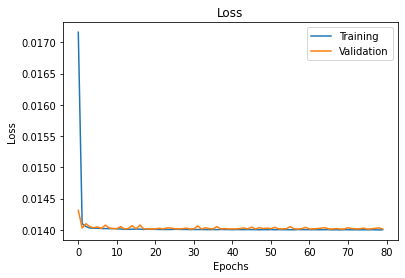

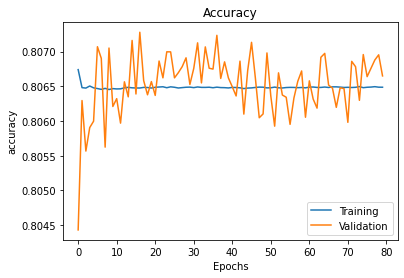

In [0]:
hist = pd.DataFrame(train_history.history)
hist['epoch'] = train_history.epoch
plt.title('Loss')
plt.plot(hist['epoch'],hist['loss'],  label='Training')
plt.plot( hist['epoch'], hist['val_loss'],label='Validation')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.title('Accuracy')
plt.plot(hist['epoch'],hist['accuracy'],  label='Training')
plt.plot( hist['epoch'], hist['val_accuracy'],label='Validation')
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [0]:
model.save('denoising_autoencoder.model')
no_noise_image = model.predict(x_test_noisy)



INFO:tensorflow:Assets written to: denoising_autoencoder.model/assets


In [0]:
print(no_noise_image.shape)

(6000, 28, 28, 1)


***Print denoised image***

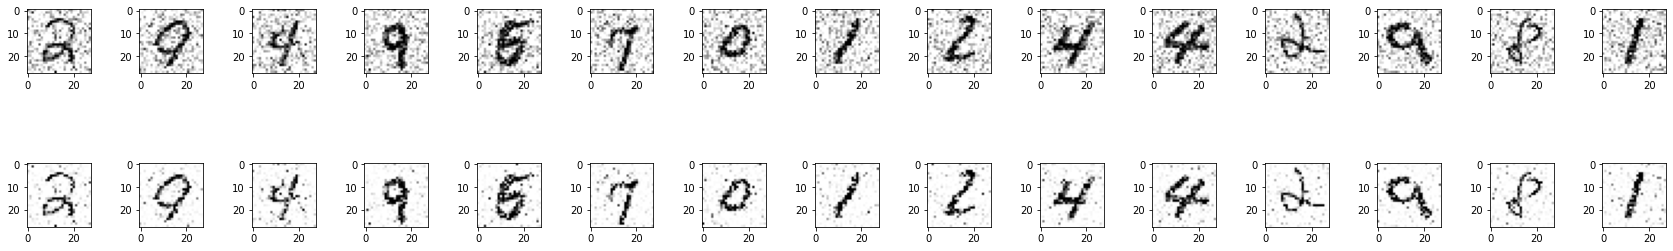

In [0]:
from random import seed
from random import randint
seed(1)
plt.figure(figsize=(40,4))
for i in range(15):
  #display original image
  j = randint(0,3000)
  ax = plt.subplot(3,20,i+1)
  plt.imshow(x_test_noisy[j].reshape(28,28), cmap = 'binary')

  #display noise removed image
  ax = plt.subplot(3,20, 40+i+1)
  plt.imshow(no_noise_image[j].reshape(28,28), cmap = 'binary')
plt.show()

## ***Denoise image using CNN***


In [21]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu', padding='same', input_shape=(28,28,1)))
model2.add(tf.keras.layers.MaxPooling2D((2,2), padding='same'))
model2.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',padding='same'))
model2.add(tf.keras.layers.MaxPooling2D((1,1), padding='same'))
model2.add(tf.keras.layers.Conv2D(8,(3,3),activation='relu',padding='same'))
model2.add(tf.keras.layers.MaxPooling2D((1,1), padding='same'))
model2.add(tf.keras.layers.Conv2D(8,(3,3),activation='relu',padding='same'))

model2.add(tf.keras.layers.MaxPooling2D((2,2), padding='same'))

model2.add(tf.keras.layers.Conv2D(8,(3,3),activation='relu',padding='same'))
model2.add(tf.keras.layers.MaxPooling2D((1,1), padding='same'))
model2.add(tf.keras.layers.Conv2D(8,(3,3),activation='relu',padding='same'))
model2.add(tf.keras.layers.UpSampling2D((2,2)))
model2.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',padding='same'))
model2.add(tf.keras.layers.UpSampling2D((2,2)))
model2.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'))
model2.add(tf.keras.layers.UpSampling2D((1,1)))
model2.add(tf.keras.layers.Conv2D(1,(3,3),activation='relu',padding='same'))



optimizer2 = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model2.compile(optimizer = optimizer2, loss = 'mse', metrics=['accuracy'])
model2.summary()

train_history2 = model2.fit(x_train_noisy, x_train, epochs = 80, batch_size = 64, shuffle=True, validation_data= (x_test_noisy, x_test))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 8)        

***Calculate Accuracy***

In [22]:
_, train_acc2 = model2.evaluate(x_train_noisy, x_train, verbose=0)
_, test_acc2 = model2.evaluate(x_test_noisy, x_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc2, test_acc2))

Train: 0.813, Test: 0.813


***Plot loss and Accuracy***

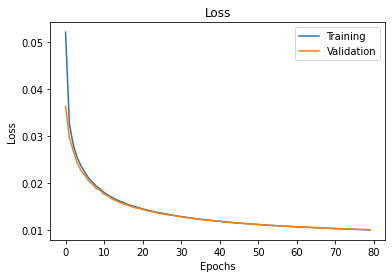

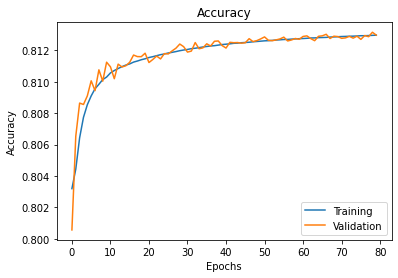

In [23]:
hist = pd.DataFrame(train_history2.history)
hist['epoch'] = train_history2.epoch
plt.title('Loss')
plt.plot(hist['epoch'],hist['loss'],  label='Training')
plt.plot( hist['epoch'], hist['val_loss'],label='Validation')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.title('Accuracy')
plt.plot(hist['epoch'],hist['accuracy'],  label='Training')
plt.plot( hist['epoch'], hist['val_accuracy'],label='Validation')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
model2.save('denoising_autoencoder2.model')
no_noise_image = model2.predict(x_test_noisy)

INFO:tensorflow:Assets written to: denoising_autoencoder2.model/assets


***Print the denoised image***

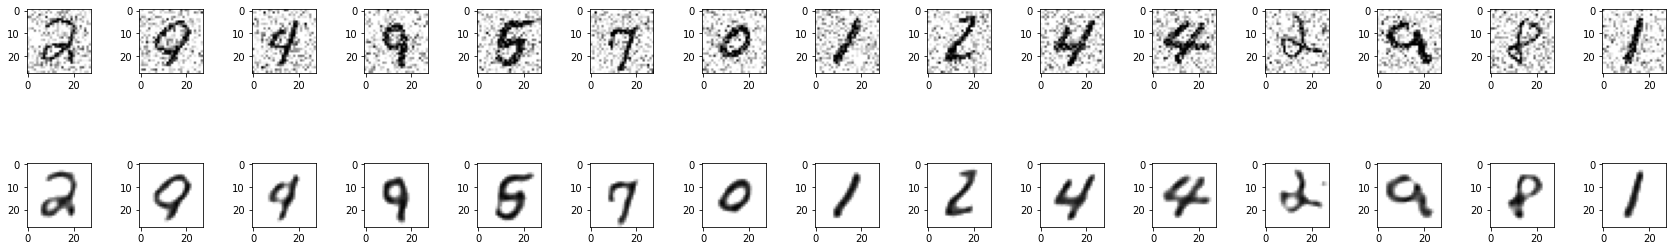

In [25]:
from random import seed
from random import randint
seed(1)
plt.figure(figsize=(40,4))
for i in range(15):
  #display original image
  j = randint(0,3000)
  ax = plt.subplot(3,20,i+1)
  plt.imshow(x_test_noisy[j].reshape(28,28), cmap = 'binary')

  #display noise removed image
  ax = plt.subplot(3,20, 40+i+1)
  plt.imshow(no_noise_image[j].reshape(28,28), cmap = 'binary')
plt.show()

***MLP and CNN accuracy***

In [0]:
print("Accuracy MLP: {0:.2f}%".format(test_acc * 100))
print("Accuracy CNN: {0:.2f}%".format(test_acc2 * 100))

Accuracy MLP: 80.66%
Accuracy CNN: 81.01%
